# Zadanie 04 (b)
---
#### Oblicz numeryczną wartość całki $$\int_{0}^{4} x e^{2x} dx$$ korzystając z metod:
+ metody prostokątów
+ metody trapezów
+ metody Simpsona 3/8


**Punktacja**
+ impementacja metody prostokątów **1p.**
+ impementacja metody trapezów **1p.**
+ impementacja metody Simpsona 3/8 **1p.**
+ wykres przedstawiający wartości całki w zależności od liczby przedziałów użytych do jej obliczenia (dla wszystkich metod) **1p.**


## Metoda prostokątów
---
![title](http://www.if.pw.edu.pl/~ryczkowski/download/MN/04/rectangle.png)

$$I(f) = \sum_{i=1}^{N} f(x_i)(x_{i+1}-x_i) = h\sum_{i=1}^{N} f(x_i)$$

## Metoda trapezów
---

$$I(f) = h \sum_{i=1}^{N} \left[ \frac{f(x_i)+f(x_{i+1})}{2} \right]$$

## Metoda Simpsona 3/8
---
![title](http://www.if.pw.edu.pl/~ryczkowski/download/MN/04/simpsona38.png)

$$I(f) = \frac{3h}{8} \sum_{i=1,4,7}^{N} \left[ f(x_{i}) + 3f(x_{i+1}) + 3f(x_{i+2}) + f(x_{i+3}) \right] $$

## Wykonanie
---
Wczytanie bibliotek

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Deklaracja funkcji oraz przedziału dla których liczona będzia całka

In [2]:
f = lambda x: x*np.exp(2*x)
a = 0
b = 4

Implementacja funkcji realizującej metodę prostokątów

In [23]:
def rectangle(func, a, b, N):
    
    I = 0
    h = np.abs(b-a)/N
    for i in range(N):
        I += func(a+i*h)
    
    I *= h
    return I

Sprawdzenie poprawności

In [24]:
print(abs(rectangle(f,a,b,100)-integrate.quad(f, a, b)[0]) < 250)
print(abs(rectangle(f,a,b,100)))

True
4982.02638838


Implementacja funkcji realizującej metodę trapezów

In [43]:
def trapezoidal(func, a, b, N):
    
    I = 0
    h = np.abs(b-a)/N
    for i in range(N):
        I += func(a+i*h) + func(a+(i+1)*h)
    
    I *= h * 0.5
    return I

Sprawdzenie poprawności

In [44]:
print(abs(trapezoidal(f,a,b,100)-integrate.quad(f, a, b)[0]) < 5)
print(abs(trapezoidal(f,a,b,100)))

True
5220.50302735


Implementacja funkcji realizującej metodę Simpsona 3/8

In [54]:
def simpsona38(func, a, b, N):
    
    I = 0
    h = np.abs(b-a)/N
    for i in range(int(N/3)):
        I += func(a+3*i*h) + 3*func(a+(3*i+1)*h) + 3*func(a+(3*i+2)*h) + func(a+(3*i+3)*h)
    
    I *= h * 3 / 8
    return I

Sprawdzenie poprawności

In [55]:
print(abs(simpsona38(f,a,b,99)-integrate.quad(f, a, b)[0]) < 5e-3)
print(abs(simpsona38(f,a,b,99)))

True
5216.93083827


Porównanie zbierzności metod

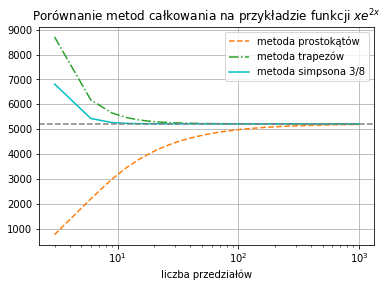

In [79]:
_max = 1000
N = range(3,_max,3)


r = []
t = []
s = []
n = []

for i in N:
    r.append(rectangle(f,a,b,i))
    t.append(trapezoidal(f,a,b,i))
    s.append(simpsona38(f,a,b,i))
    n.append(i)

plt.plot(n,r,'--C1',label = 'metoda prostokątów')
plt.plot(n,t,'-.C2',label = 'metoda trapezów')
plt.plot(n,s,'c',label = 'metoda simpsona 3/8')
plt.legend()
plt.grid()
plt.xlabel('liczba przedziałów')
plt.xscale('log')
plt.title(r'Porównanie metod całkowania na przykładzie funkcji $x e^{2x}$')
plt.axhline(y=integrate.quad(f, a, b)[0], ls='--', c='grey')
plt.show()